In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
income_ineq = pd.read_csv('estonia_inequality_data.csv')
internet_acc = pd.read_csv('est_internet_data.csv')

In [3]:
group_df = internet_acc
group_df['income_inequality'] = income_ineq

In [4]:
group_df.head()

,Internet,income_inequality
0,2.779,0.55
1,3.525,0.52
2,5.706,0.52
3,10.796,0.53
4,14.501,0.54


In [5]:
group_df.describe()

,Internet,income_inequality
count,25.000000,25.000000
mean,56.302400,0.509200
std,30.381679,0.035464
min,2.779000,0.450000
25%,31.528000,0.480000
50%,66.190000,0.510000
75%,80.004000,0.540000
max,89.532000,0.570000


In [6]:
index_names = group_df[ group_df['Internet '] < 40 ].index 
group_df.drop(index_names, inplace = True) 

In [7]:
group_df.head()

,Internet,income_inequality
7,41.52,0.55
8,45.32,0.57
9,53.20,0.54
10,61.45,0.56
11,63.51,0.53


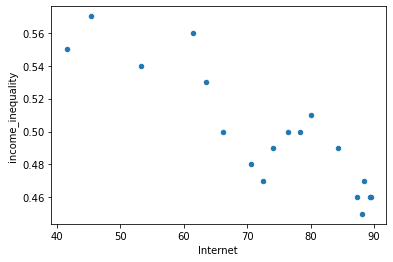

In [8]:
group_df.plot(kind='scatter',x='Internet ', y='income_inequality')
plt.show()

In [9]:
income_ineq = group_df['income_inequality'].to_frame()

In [10]:
group_df = group_df.drop(['income_inequality'], axis = 1) 

In [11]:
group_df.head()

,Internet
7,41.52
8,45.32
9,53.20
10,61.45
11,63.51


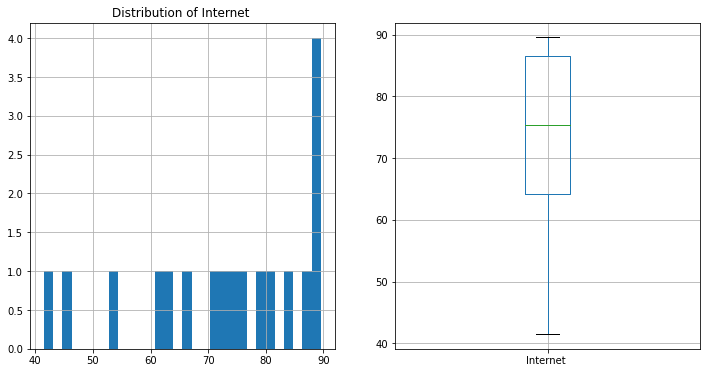

In [12]:
for col in group_df.columns:
    f, axes = plt.subplots(1,2,figsize=(12,6))
    group_df[col].hist(bins = 30, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    group_df.boxplot(column = col, ax = axes[1])
    plt.show()

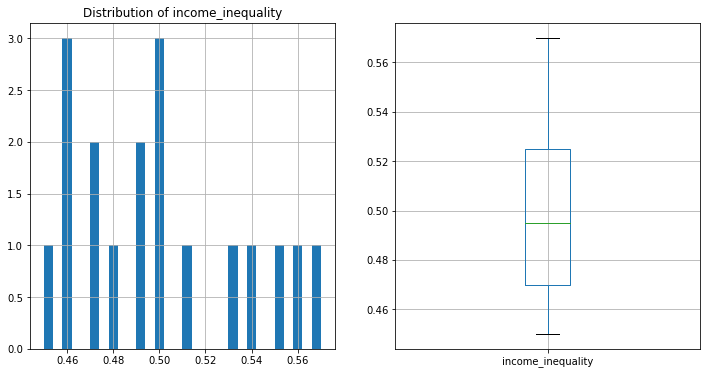

In [13]:
for col in income_ineq.columns:
    f, axes = plt.subplots(1,2,figsize=(12,6))
    income_ineq[col].hist(bins = 30, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    income_ineq.boxplot(column = col, ax = axes[1])
    plt.show()

In [14]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(group_df, income_ineq, test_size = 0.2, random_state = 5)

print('Training Set:')
print('Number of X datapoints: ', X_train.shape[0])
print('Number of X features: ', X_train.shape[1])
print('Number of Y datapoints: ', Y_train.shape[0])
print('Number of Y features: ', Y_train.shape[1])



print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features: ', X_test.shape[1])

Training Set:
Number of X datapoints:  14
Number of X features:  1
Number of Y datapoints:  14
Number of Y features:  1


Test Set:
Number of datapoints:  4
Number of features:  1


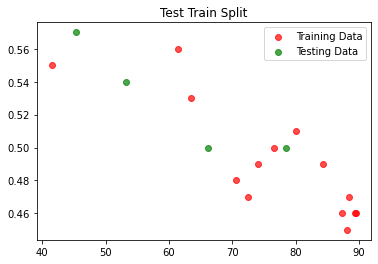

In [15]:
plt.scatter(X_train, Y_train, label='Training Data', color='r',alpha = .7)
plt.scatter(X_test, Y_test, label='Testing Data', color='g',alpha = .7)
plt.legend()
plt.title('Test Train Split')
plt.show()

In [16]:
numeric_columns = ['Internet ']
def scale_numeric(data, numeric_columns, scaler):
    for col in numeric_columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))
    return data

In [17]:
scaler = StandardScaler()
X_train = scale_numeric(X_train.copy(), numeric_columns, scaler)
X_test = scale_numeric(X_test.copy(), numeric_columns, scaler)
Y_train = scaler.fit_transform(Y_train.copy().values.reshape(-1,1))
Y_test = scaler.fit_transform(Y_test.copy().values.reshape(-1,1))


In [18]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

Mean Squared Error:  0.1401109758398315
Mean Absolute Error  0.32656762633801284
R^2:  0.8598890241601685


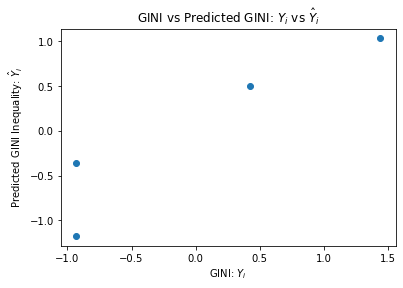

In [19]:
def evaluate(Y_test, Y_pred):
    mse = metrics.mean_squared_error(Y_test, Y_pred)
    msa = metrics.mean_absolute_error(Y_test, Y_pred)
    r2 = metrics.r2_score(Y_test, Y_pred)

    print('Mean Squared Error: ', mse)
    print('Mean Absolute Error ', msa)
    print('R^2: ', r2)
    
    plt.scatter(Y_test, Y_pred)
    plt.xlabel("GINI: $Y_i$")
    plt.ylabel("Predicted GINI Inequality: $\hat{Y}_i$")
    plt.title("GINI vs Predicted GINI: $Y_i$ vs $\hat{Y}_i$")

evaluate(Y_test, Y_pred)
